# Kaggle Competition - House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Installing Pycaret and Shap

In [3]:
!pip install pycaret==2.0
!pip install shap


     |████████████████████████████████| 256kB 5.6MB/s 
     |████████████████████████████████| 13.9MB 306kB/s 
     |████████████████████████████████| 1.8MB 38.2MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 6.8MB 40.7MB/s 
     |████████████████████████████████| 266kB 40.5MB/s 
     |████████████████████████████████| 276kB 42.3MB/s 
     |████████████████████████████████| 1.6MB 35.9MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
     |████████████████████████████████| 66.3MB 111kB/s 
     |████████████████████████████████| 163kB 52.5MB/s 
     |████████████████████████████████| 153kB 48.6MB/s 
     |████████████████████████████████| 1.1MB 48.5MB/s 
     |████████████████████████████████| 337kB 44.4MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 245kB 51.6MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
 

## Loading the necessary packages and mounting googledrive

In [97]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [98]:
from pycaret.regression import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings  
warnings.filterwarnings('ignore')
from pycaret.utils import version
version()

2.0


## Loading the Training and Testing Data

In [99]:

train = pd.read_csv('https://github.com/JaiminBrahmbhatt/RegressionTechniques/raw/main/train.csv')

test = pd.read_csv('https://github.com/JaiminBrahmbhatt/RegressionTechniques/raw/main/test.csv')

print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [194]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,

In [195]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [101]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print('Quantitative features are:', quantitative)
print('Qualitative features are:', qualitative)

Quantitative features are: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Qualitative features are: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', '

### Overview

There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

*Quantitative*: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

*Qualitative*: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities, 

## Target Feature Analysis

We will plot **Histogram** and **QQPlot** to analyze the distribution and skewness type of the target feature.

Skewness Co-efficient: 1.883


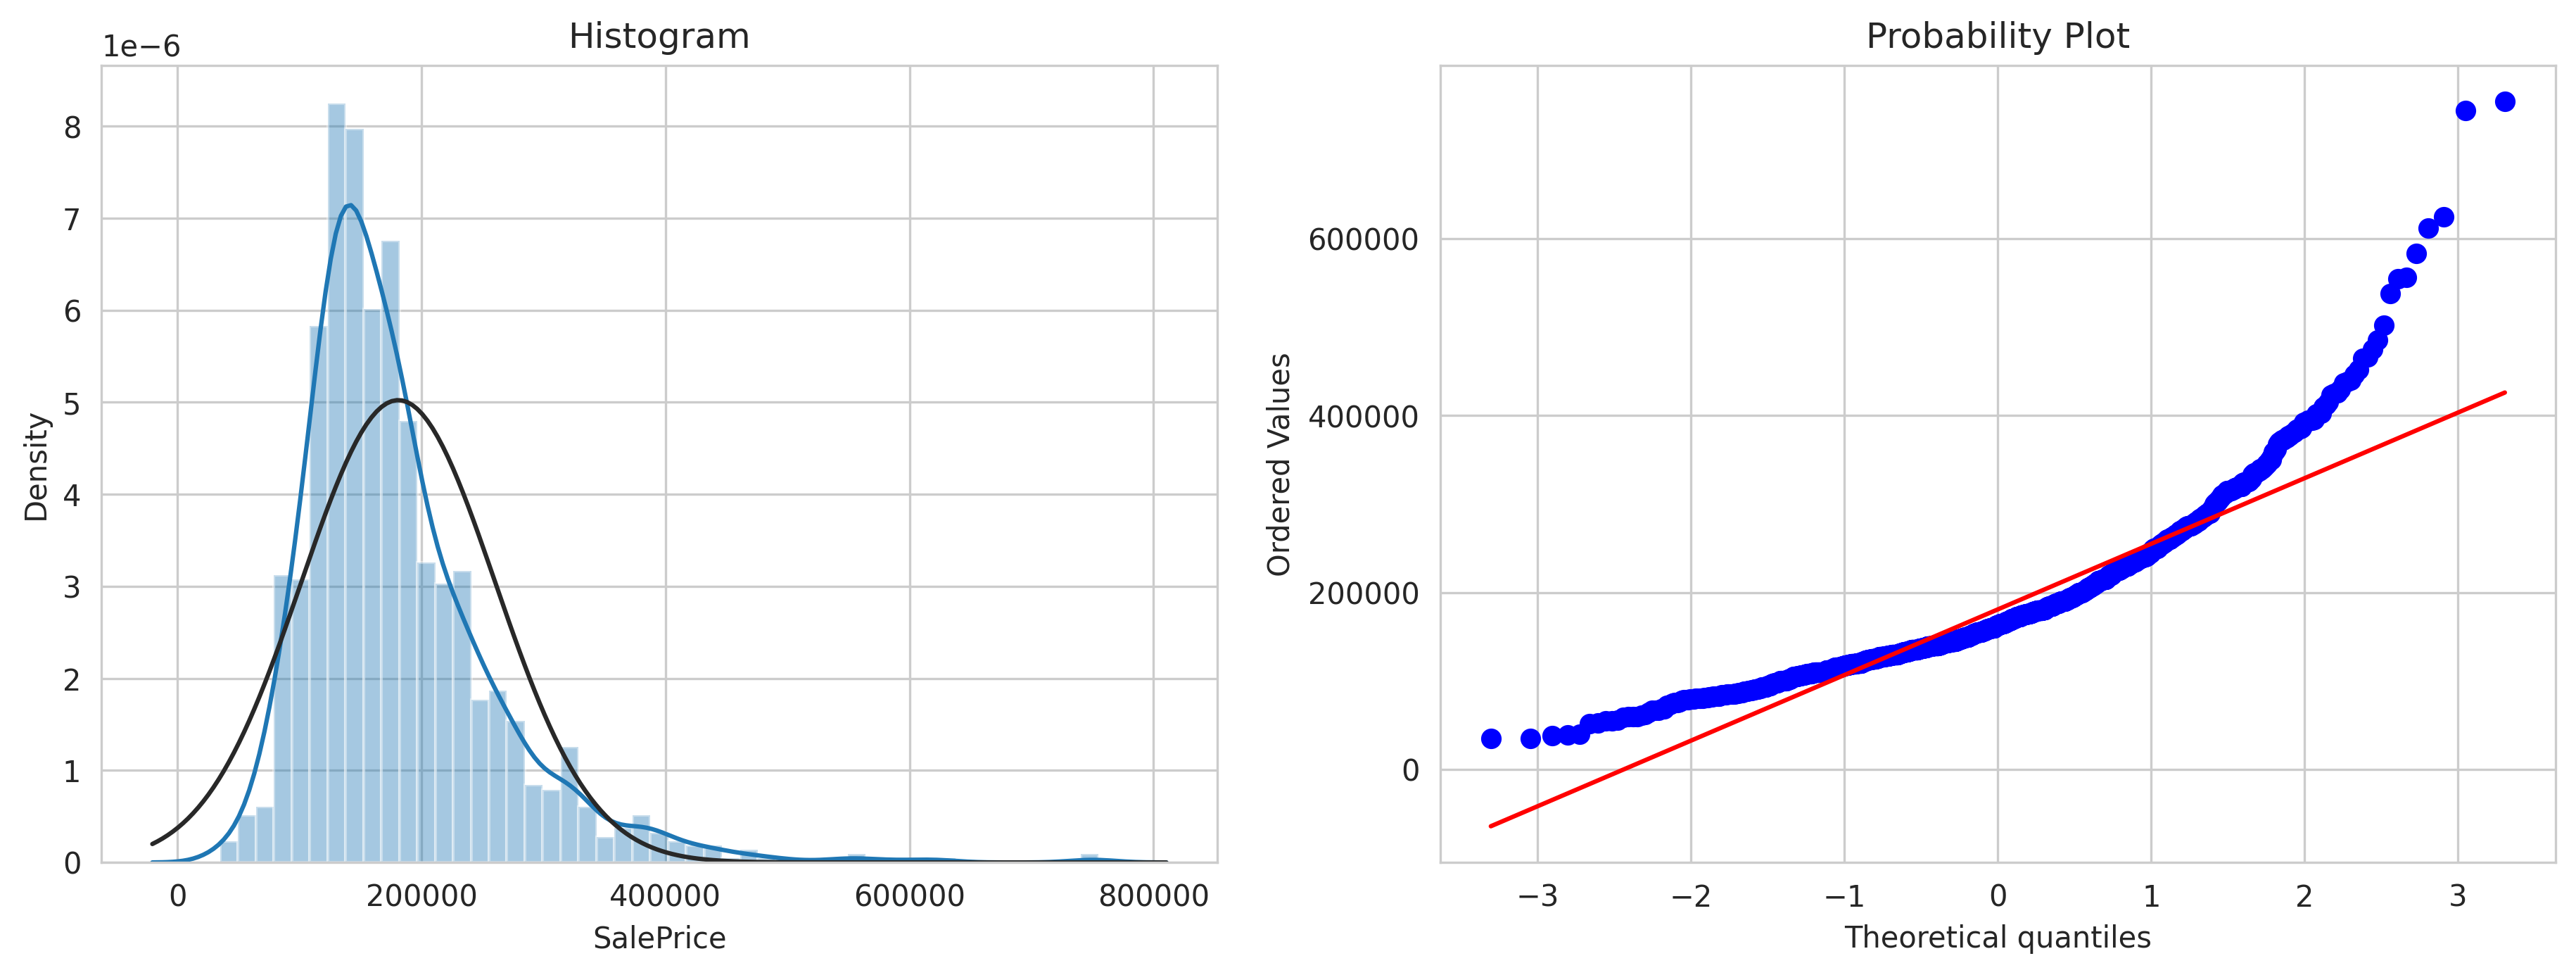

In [102]:
##### GET SKEWNESS #####
print(f"Skewness Co-efficient: {round(train.SalePrice.skew(), 3)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

##### HISTOGRAM #####
from scipy import stats
sns.distplot(train['SalePrice'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

##### PROBABILITY / QQ PLOT #####
stats.probplot(train['SalePrice'], plot=ax2)

plt.show()

**Analysis:**

* The Skewness co-efficient suggested the target feature is positive skewed.
* We will apply log transformation to the feature to make the distribution close to gaussian.
* We will apply `log(1+x)` transformation to avoid `0` values (if present).
* After transforming the variable, we will see both the above plots again.

Skewness Co-efficient: 0.121


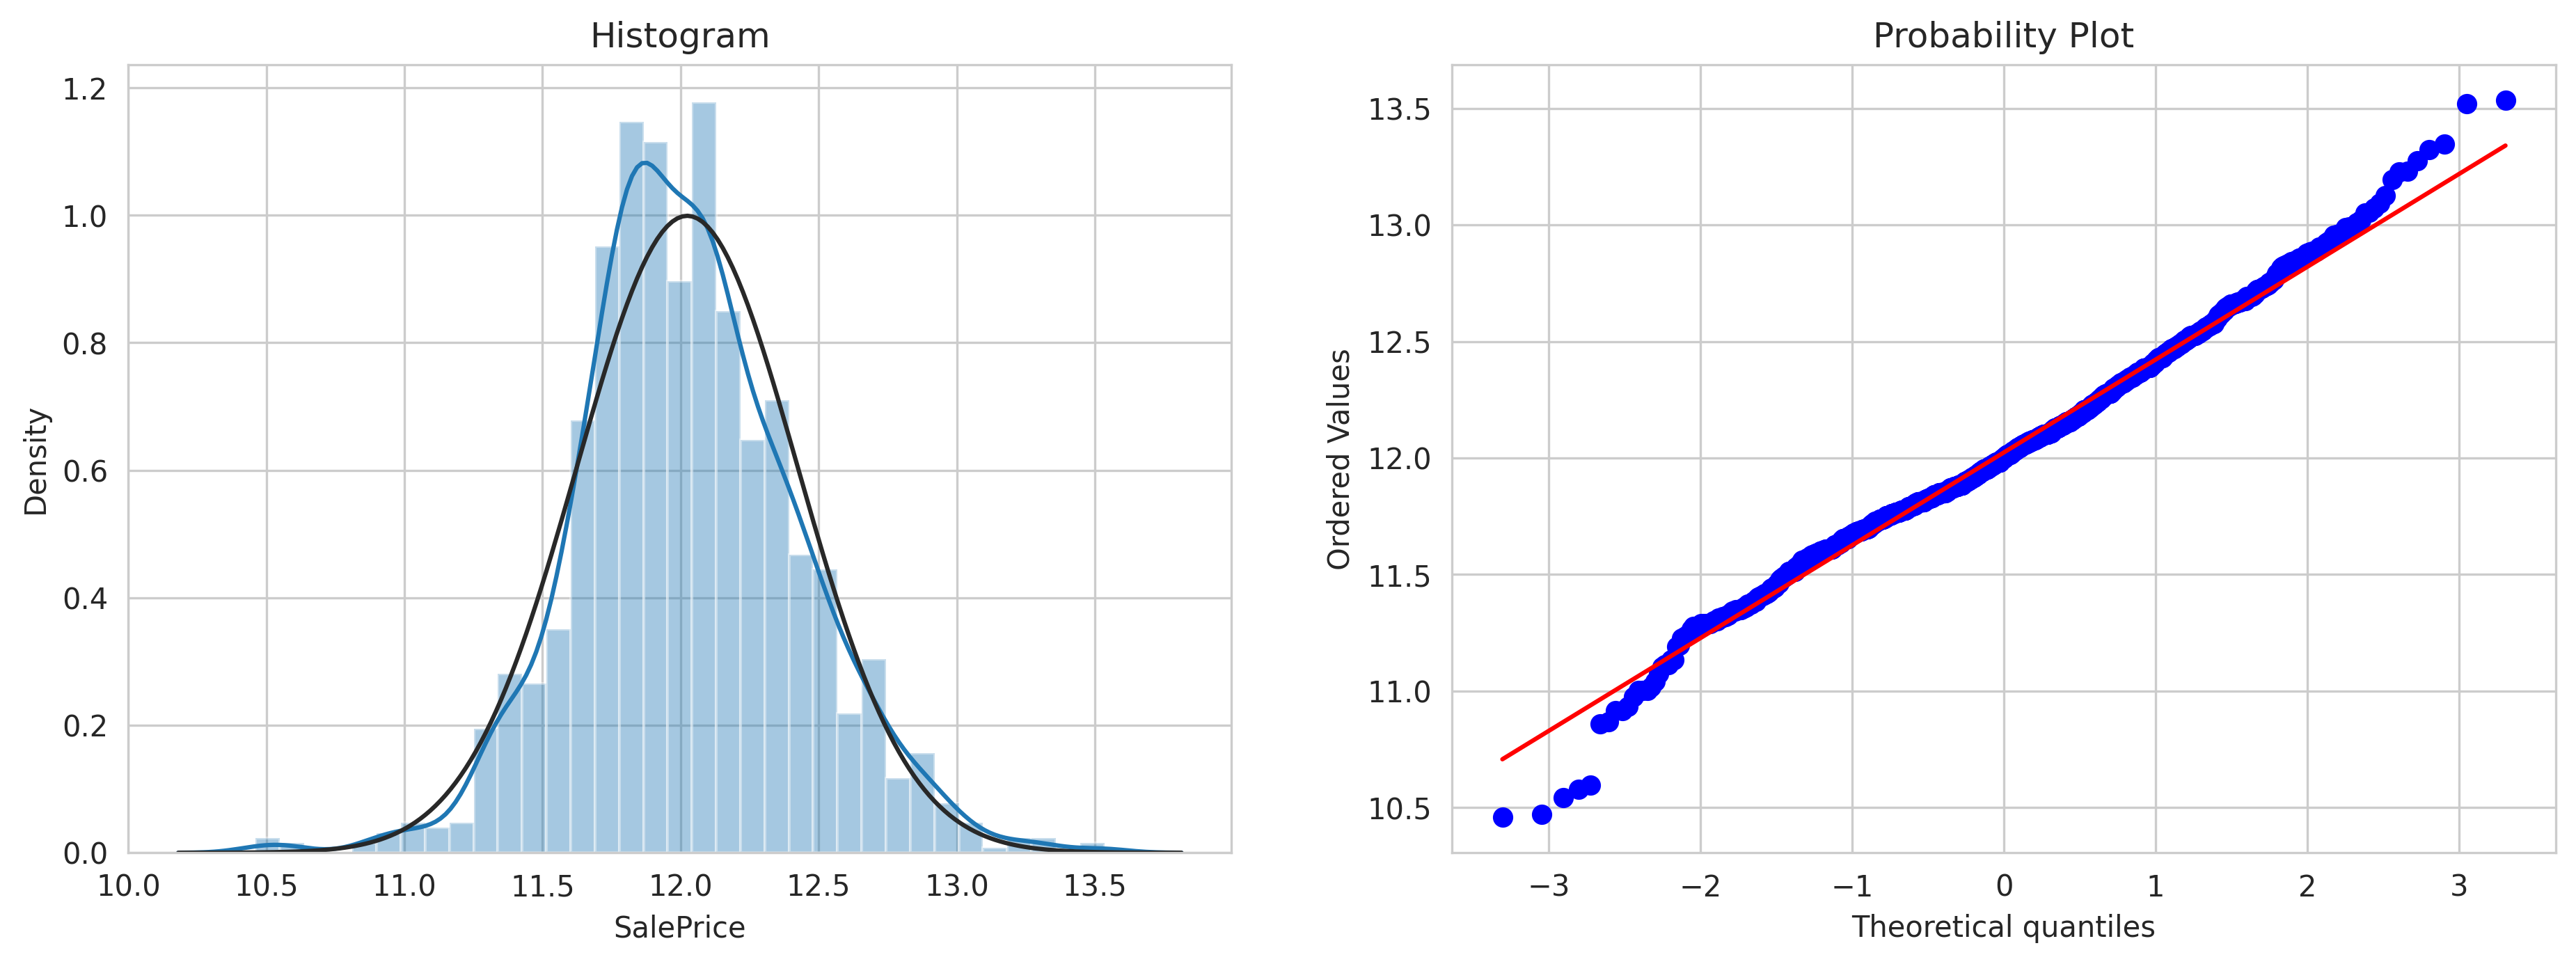

In [103]:
train["SalePrice"] = np.log1p(train["SalePrice"])

##### GET SKEWNESS #####
print(f"Skewness Co-efficient: {round(train.SalePrice.skew(), 3)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

##### HISTOGRAM #####
from scipy import stats
sns.distplot(train['SalePrice'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

##### PROBABILITY / QQ PLOT #####
stats.probplot(train['SalePrice'], plot=ax2)

plt.show()

**After-Transformation Analysis:**
* The skewness has reduced (from `1.883` to `0.121`) and the plot now looks close to the normal distribution.
* Even the probability plot can confirm the same.

**We will be concatenating our `train` and `test` dataframes for two purpose**
1. To avoid repeating all the operations (such as transformations, imputations, etc) done on the train set for the test set.
2. To get more data for our analysis (`More the data, the BETTER it is.!!`)

In [104]:
'''
    Store the number of rows or indexes for train and test dataset
    to separate them while performing modeling and prediction.
'''
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)

nindex, nfeatures = all_data.shape

# Data Preparation

## Missing Value Imputation

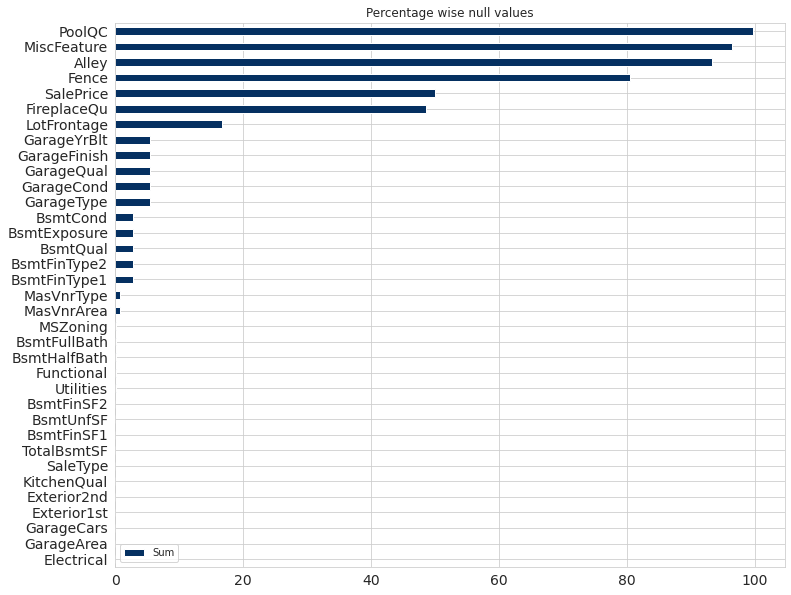

In [105]:
## Get the dataframe with all the features and SUM of the NaN values present
df_null_count = all_data.isnull().sum().to_frame().rename({0:"Sum"}, axis=1)

## Select only those features who have atleast 1 NaN value
df_null_count = df_null_count[df_null_count['Sum'] > 0]

## Change the SUM to PERCENTAGE 
df_null_count['Sum'] = df_null_count['Sum']*(100/nindex)

## Plot a Horizontal Bar Graph
df_null_count.sort_values(by="Sum", ascending=True).plot(
    kind='barh', figsize=(12,10), fontsize=14, colormap="RdBu_r", title="Percentage wise null values"
)
plt.show()

**Analysis:**
* `PoolQC`, `MiscFeature`, and `Alley` have more than 50% values as `NaN`. Our first impression will be to drop them but instead in our analysis we will take these features and leave it to our `feature selection` algorithm to provide important set of features.
* We will perform Missing Value Imputation for each and every feature mentioned in the bar graph. 
* `SalePrice` will be ignored since the missing  values belong to the test set. Out train set does not contain any missing values. We can confirm the same by the following code.

### PoolQC :: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

`NaN` must be a blank field in the data corresponding to `NA` i.e. *No Pool*

Replacing `NaN` with a string value `None`

Also, the values can be represented in an order ie ORDINAL Variable.

In [106]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

quality_map = {
    "None": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4
}

all_data['PoolQC'].replace(quality_map, inplace=True)

### MiscFeature :: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	  None

`NaN` must be a blank field in the data corresponding to no miscellaneous feature.

Replacing `NaN` with a string value `None`

In [107]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

### Alley :: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       

`NaN` must be a blank field in the data corresponding to no alley access.

Replacing `NaN` with a strig value `None`

In [108]:
all_data['Alley'] = all_data['Alley'].fillna('None')

### Fence :: Fence Quality

       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       

`NaN` must be a blank field in the data corresponding to no fence.

Replacing `NaN` with a strig value `None`

In [109]:
all_data['Fence'] = all_data['Fence'].fillna('None')

### FireplaceQu :: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
`NaN` must be a blank field in the data corresponding to no fireplace.

Replacing `NaN` with a strig value `None`

In [110]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

quality_map = {
    "None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5
}

all_data['FireplaceQu'].replace(quality_map, inplace=True)

### LotFrontage :: Linear feet of street connected to property

Since it is a numeric feature, let us try to impute mean or median values by refering to the distribution of the feature values.

In [111]:
all_data['LotFrontage'].dtype

dtype('float64')

Skewness value: 1.50


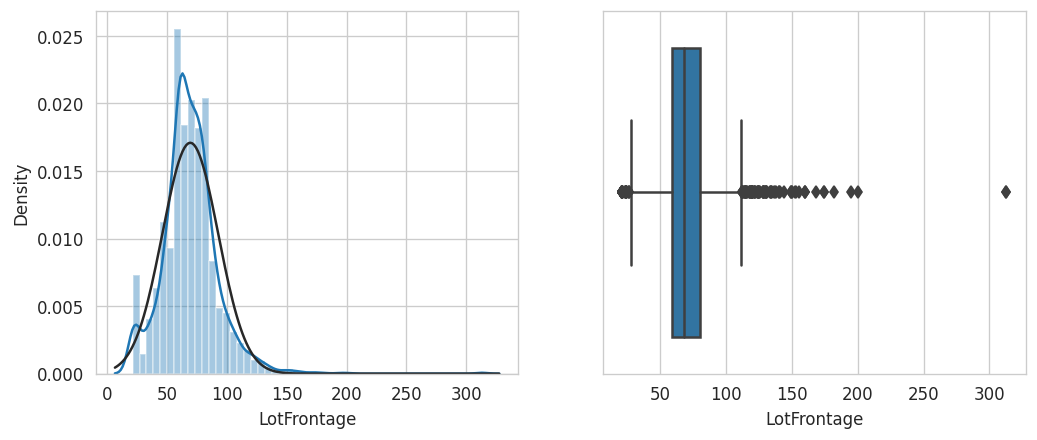

In [112]:
from scipy.stats import norm, skew

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120)

sns.distplot(all_data['LotFrontage'].dropna(), fit=norm, ax=ax1)
sns.boxplot(all_data['LotFrontage'].dropna(), ax=ax2)

print(f"Skewness value: %.2f" %all_data['LotFrontage'].dropna().skew())

#### The skewness value of `2.16` and the boxplot denote that the distribution is highly positive skewed with high number of outliers (extreme values). 

#### Therefore, we will make use of`median` imputation instead of `mean` imputation to avoid extreme values to have an impact.

In [113]:
all_data['LotFrontage'].fillna(value=all_data['LotFrontage'].median(), inplace=True)

### Analysis of Garage Feature

There are a total of 5 Garage Features having null values in them -

*GarageType: Garage location*
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
*GarageYrBlt: Year garage was built*
		
*GarageFinish: Interior finish of the garage*

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

*GarageQual: Garage quality*

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
*GarageCond: Garage condition*

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
*GarageCars: Size of garage in car capacity*

*GarageArea: Size of garage in square feet*

---
       
Our assumption is that `NaN` values correspond to houses with no garages.
       
Let us create a Garage Dataframe to further analyse the null values present.

In [114]:
df_no_garage = all_data[[
    'GarageYrBlt', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageCars', 'GarageArea'
]][
    all_data['GarageType'].isnull()
]

df_no_garage.head(5)

,GarageYrBlt,GarageCond,GarageFinish,GarageQual,GarageType,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0
48,NaN,NaN,NaN,NaN,NaN,0.0,0.0
78,NaN,NaN,NaN,NaN,NaN,0.0,0.0
88,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In the above dataframe we can notice that when the feature `GarageTpe` is `NaN`, the corresponding categorical Garage features are also `NaN` and the numerical features are `0`. This clearly indicates absence of garage for the house.

In [115]:
print(f"Total number of entries with Null Garage Type are {len(df_no_garage.index)}.")

Total number of entries with Null Garage Type are 157.


**Here we can safely impute the `NaN` values with string value of `None` for all the above features.**

**NOTE**: The additional two features GarageCars and GarageArea have a value of `0` for the corresponding `NaN` values.

In [116]:
for feature in ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']:
    all_data[feature].fillna(value='None', inplace=True)
    
for feature in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    all_data[feature].fillna(value=0, inplace=True)

#### Further analysis of Garage Features

* `GarageFinish`, `GarageQual` and `GarageCond` can be converted to ordinal variables.

In [117]:
#all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)

quality_map = {
    "None": 0, "Po": 1,"Fa": 2, "TA": 3, "Gd": 4, "Ex": 5
}

all_data['GarageQual'].replace(quality_map, inplace=True)
all_data['GarageCond'].replace(quality_map, inplace=True)

quality_map = {
    "None": 0, "Unf": 1, "RFn": 2, "Fin": 3
}

all_data['GarageFinish'].replace(quality_map, inplace=True)

#### We could see a similar kind of pattern being followed by the next 5 basement features. Let us analyse these features using a similar approach.

### Analysis of Basement Features

There are a total of 5 Garage Features having null values in them -

*BsmtQual: Evaluates the height of the basement*

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
*BsmtCond: Evaluates the general condition of the basement*

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
*BsmtExposure: Refers to walkout or garden level walls*

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
*BsmtFinType1: Rating of basement finished area*

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

*BsmtFinType2: Rating of basement finished area (if multiple types)*

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
 
*BsmtFullBath: Basement full bathrooms*

*BsmtHalfBath: Basement half bathrooms*

*BsmtFinSF1: Type 1 finished square feet*

*BsmtFinSF2: Type 2 finished square feet*

*BsmtUnfSF: Unfinished square feet of basement area*

*TotalBsmtSF: Total square feet of basement area*

---
       
Let us create a Basement Dataframe to further analyse the null values present.

In [118]:
no_basement_df = all_data[[
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtFinSF1', 
    'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF'
]][
    all_data['BsmtQual'].isnull()
]

no_basement_df.head(5)

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
print(f"Total number of entries with Null Basement Cond are {len(no_basement_df.index)}.")

Total number of entries with Null Basement Cond are 81.


#### Safely imputing `NaN` value with string value of `None` for all the categorical features and `0` for numeric variables.

In [120]:
for feature in ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual']:
    all_data[feature].fillna(value='None', inplace=True)
    
for feature in ['BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF']:
    all_data[feature].fillna(value=0, inplace=True)

#### Further Analysis of Basement Feature

* All the basement features can be converted in to `ordinal` variables. (Label Encoding)

In [121]:
''' BsmtCond and BsmtQual '''

quality_map = {
    "None": 0, "Po": 1,"Fa": 2, "TA": 3, "Gd": 4, "Ex": 5
}

all_data['BsmtCond'].replace(quality_map, inplace=True)
all_data['BsmtQual'].replace(quality_map, inplace=True)

''' BsmtExposure '''

quality_map = {
    "None": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4
}

all_data['BsmtExposure'].replace(quality_map, inplace=True)

''' BsmtFinType1 and BsmtFinType2 '''

quality_map = {
    "None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6
}

all_data['BsmtFinType1'].replace(quality_map, inplace=True)
all_data['BsmtFinType2'].replace(quality_map, inplace=True)

### Analysis of Masonry Veneer Type and Area

*MasVnrType: Masonry veneer type*

       BrkCmn	 Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       None	   None
       Stone	  Stone
	
*MasVnrArea: Masonry veneer area in square feet*

```code
>>> all_data['MasVnrType'].unique()
... ['BrkFace', 'None', 'Stone', 'BrkCmn', nan]
```

We can clearly see the MasVnrType feature has both `None` and `NaN` values. Therefore, the `nan` values might be true missing values. Let us impute the `MasVnrType` with the `mode` value and `MasVnrArea` with `median` value.

In [122]:
mode_val = all_data.MasVnrType.value_counts().idxmax()    # 'None'
all_data['MasVnrType'].fillna(mode_val, inplace=True) 

median_val = all_data.MasVnrArea.median()     # 0
all_data['MasVnrArea'].fillna(median_val, inplace=True)

### MSZoning :: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density


There are `4` missing values in `MSZoning` feature. Let us impute these `4 NaN` values with the `mode` value for the column. 

Also, replacing the value `C (all)` in the `MSZoning` column with only `C`.

In [123]:

print(all_data['MSZoning'].unique())
print(all_data['MSZoning'].isnull().sum())


['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
4


In [124]:
mode_val = all_data.MSZoning.value_counts().idxmax()    # 'RL'
all_data['MSZoning'].fillna(mode_val, inplace=True)

all_data['MSZoning'].replace({'C (all)': 'C'}, inplace=True)

### Utilities :: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	   Electricity only	


Before analyzing the `NaN` values, let us look at the above two blocks of code.

The first one tells us that only 2 unique values are present out of a set of 4 unique values available for the feature.

The second block tells us that except for 1 value all other values are `AllPub`. This feature does not provide any relevant information for our model so we will drop this feature.

In [125]:
print(all_data.Utilities.unique())
print(all_data.Utilities.value_counts())

['AllPub' 'NoSeWa' nan]
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [126]:
all_data.drop('Utilities', inplace=True, axis=1)

### Functional :: Home functionality (Assume typical unless deductions are warranted)

       Typ	 Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	 Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	 Severely Damaged
       Sal	 Salvage only


There are 2 `NaN` values present in the feature so let us fill these 2 values with the `mode` value.

In [127]:
print(all_data.Functional.unique())
print(all_data.Functional.isnull().sum())

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev' nan]
2


In [128]:
mode_val = all_data.Functional.value_counts().idxmax()    #'Typ'
all_data['Functional'].fillna(mode_val, inplace=True)

### Analysis of Exterior1st and Exterior2nd

Both the `Exterior1st` and `Exterior2nd` feature have 1 `NaN` value each. Instead of imputing `None` and introducing a new value for the feature, we will rather impute `Other` in place of `NaN` values since it is already present as one of the values for both the feature set.

In [129]:
all_data.Exterior1st.fillna(value='Other', inplace=True)
all_data.Exterior2nd.fillna(value='Other', inplace=True)

### Analysis of SaleType

`SaleType` feature have 1 `NaN` value. Instead of imputing `None` and introducing a new value for the feature, we will rather impute `Other` in place of the `NaN` value since it is already present as one of the values in the feature.

In [130]:
all_data.SaleType.fillna(value='Other', inplace=True)

### Electrical :: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	  Mixed
       

We have only one missing value in Electrical feature. Let us impute it with the `Mode` value.

In [131]:
print(all_data['Electrical'].unique())
print(all_data['Electrical'].isnull().sum())

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
1


In [132]:
mode_val = all_data.Electrical.value_counts().idxmax()    # 'SBrkr'
all_data['Electrical'].fillna(mode_val, inplace=True) 

### KitchenQual :: Kitchen Quality

*KitchenQual: Kitchen quality*

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       
We have only one missing value in `KitchenQual` feature. Let us impute it with the `Mode` value.

Also, we can Label encode the values since the feature values resemble ordinal variable.

In [133]:
print(all_data['KitchenQual'].unique())
print(all_data['KitchenQual'].isnull().sum())

['Gd' 'TA' 'Ex' 'Fa' nan]
1


In [134]:
mode_val = all_data.KitchenQual.value_counts().idxmax()    # 'TA'
all_data['KitchenQual'].fillna(value=mode_val, inplace=True)

quality_map = {
    "Po": 0,"Fa": 1, "TA": 2, "Gd": 3, "Ex": 4
}
all_data['KitchenQual'].replace(quality_map, inplace=True)

**Note:** We did not impute `NaN` values in `KitchenQual` feature with `None` since the feature description does not contain an option for No Kitchen present. This is also understood by the fact that Houses will definately contain a kitchen.

### At this point, we have taken care of all the missing values in our data by imputing them with a more probable value. Except the SalePrice as missing values are in test data not the train data as we merged the dataframes.

In [135]:
all_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [136]:
train['SalePrice'].isnull().sum()

0

### Drop the ID feature
The ID feature/variable is **not relevant** for our analysis so lets get rid of it. But before that, lets keep a copy of it.

In [137]:
id_copy = all_data['Id']
all_data.drop('Id', axis=1, inplace=True)

### Further analysis of features based on the feature description

---
**Street**

Feature `Street` has only two possible values, namely, `Grvl` and `Pave`. Let us make this feature binary.

Replacing `Grvl` with `1` and `Pave` with `0`.

---

**CentralAir**

Feature `CentralAir` has two values `Y` for `Yes` or `N` for `No`. 

Replacing `Y` with `1` and `N` with `0`. 

---

**HeatingQC | ExterQual | ExterCond | LandSlope | LotShape**

All the above features refers to a quality mapping.

Let us treat it as ordinal variable and perform Label Encoding.

---

**MSSubClass**

The values of the feature is of `int` type, but it actually defines some kind of `class`.

Let us treat this feature as a categorical one instead of numeric

In [138]:
''' Street '''
all_data['Street'].replace({'Grvl': 0, 'Pave': 1}, inplace=True)

''' CentralAir '''
all_data['CentralAir'].replace({'Y': 1, 'N': 0}, inplace=True)

''' HeatingQC | ExterQual | ExterCond'''
quality_map = {
    "Po": 0,"Fa": 1, "TA": 2, "Gd": 3, "Ex": 4
}
all_data.HeatingQC.replace(quality_map, inplace=True)
all_data.ExterQual.replace(quality_map, inplace=True)
all_data.ExterCond.replace(quality_map, inplace=True)

''' LandSlope '''
quality_map = { 'Sev': 0, 'Mod': 1, 'Gtl': 2 }
all_data.LandSlope.replace(quality_map, inplace=True)

''' LotShape '''
quality_map = { 'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3 }
all_data.LotShape.replace(quality_map, inplace=True)

''' MSSubClass '''
class_map = {
    20:'Class1', 30:'Class2', 40:'Class3', 45:'Class4', 50:'Class5', 60:'Class6', 
    70:'Class7', 75:'Class8', 80:'Class9', 85:'Class10', 90:'Class11', 120:'Class12',
    150:'Class13', 160:'Class14', 180:'Class15', 190:'Class16'
}
all_data.MSSubClass.replace(class_map, inplace=True)

# Feature Engineering

**Creating new features that might be relevant for our Model.**

In [139]:
'''
    Usually we rely more on the total area of the house rather than talking about individual areas.
    Create a new feature which sums up all the area parameters to give us the total area available in the house.
'''
all_data['TotalSF'] = all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['GrLivArea'] + all_data['TotalBsmtSF']

'''
    The Year features do not provide much information. We can rather work on getting more concrete information like
    No. of Years ie Age instead of actual year.
'''
## Age of the house at the time of buying
all_data['Age'] = all_data.YrSold - all_data.YearBuilt

## No. of years since the house was remodeled at the time of buying
all_data['AgeRemod'] = all_data.YrSold - all_data.YearRemodAdd

## No. of years since the Garage was built at the time of buying
'''
    For the houses without garages we have already impted them with 0.0
    So, before building the new feature  we will replace them with the corresponding values in YrSold.
    This will ensure that the AgeGarage feature will be 0 for the houses that do not have Garage.
    If we do not perform the above operation then we will get an Age which is ~ 2000.
'''
all_data['GarageYrBlt'].replace({0.0: np.nan}, inplace=True)
all_data['GarageYrBlt'].fillna(all_data['YrSold'], inplace=True)
all_data['AgeGarage'] = all_data.YrSold - all_data.GarageYrBlt

In [140]:
(all_data.YrSold - all_data.YearBuilt).unique()

array([  5,  31,   7,  91,   8,  16,   3,  36,  77,  69,  43,   1,  46,
        48,  78,  40,  39,   4,  51,   6,  42,   2,  59,  49,  81,  88,
        15,  55,  57,  53,  41,  24,  33,  47,  89,  10,  72,  25,  52,
        44,   0,  87,  12,  65,  34,  11,  56,  95,  60,  99,  14,  94,
        13,  45,  97,  90,  30,  76, 122,  54,  62,  20,  37,  68,  50,
        71,   9,  38,  18,  58,  70,  32,  35,  83,  84,  66,  19,  22,
        86,  98, 114,  93,  75,  82,  17, 106,  29,  96,  27,  92, 128,
        61,  67,  21,  26, 108,  28,  63,  73,  74,  80, 115, 126, 102,
        85,  23, 110, 117, 129,  64, 100, 111, 104, 119, 127, 107, 135,
       109, 136, 103,  79, 125, 120, 118, 113, 112,  -1, 101])

In [141]:
(all_data.YrSold - all_data.YearRemodAdd).unique()

array([ 5, 31,  6, 36,  8, 14,  2, 58, 43,  0, 46, 48, 40, 39,  4, 44, 57,
        9, 10,  1, 51, 19,  3, 53, 41, 24, 28, 47, 56, 52, 11, 60, 21, 34,
        7, 42, 13, 27, 12, 45, 16, 25, 30, 33, 54, 20, 37, 50, 15, 38, 17,
       32, 35, 22, 18, 59, 29, 49, 26, -1, 55, 23, -2])

**Analysis: `all_data['Age']`**

There is one negative value (-1) in `all_data['Age']` which indicates that the Customer bought the house a year before it was built. We can confirm the same with the above code.

We will replace this value with `0` to avoid negative values.

**Analysis: `all_data['AgeRemod']`**

There are two negative value (-1, -2) in `all_data['AgeRemod']` which indicates that the Customer has done the renovation after buying the house. We can confirm the same with the above code.

We will replace this value with `0` to avoid negative values.

**NOTE:** We will drop the original time variables because we have already built new features from the information that these time variables are providing.

In [142]:
all_data.Age       =  all_data.Age.map(lambda x: 0 if x < 0 else x)
all_data.AgeRemod  =  all_data.AgeRemod.map(lambda x: 0 if x < 0 else x)
all_data.AgeGarage =  all_data.AgeGarage.map(lambda x: 0 if x < 0 else x)

all_data.drop(
    ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt', 'MoSold'], 
    axis=1, inplace=True
)

### Analysis of Numeric Features

Let us check the **correlation** of different **numeric features** with the dependent variable `SalesPrice`.

We know that the correlation value signifies the type of correlation between two variables.

We can say that the correlation is of -
* High Degree     :: If the coefficient value lies between $\pm0.50$ and $\pm1$    (_Strong Correlation_)
* Moderate Degree :: If the coefficient value lies between $\pm0.30$ and $\pm0.49$ (_Medium Correlation_)
* Low Degree      :: If the coefficient value lies between $-0.29$ to $0.29$ (_Weak Correlation_)

Let us identify all the numeric features having one of the above degree of correlation

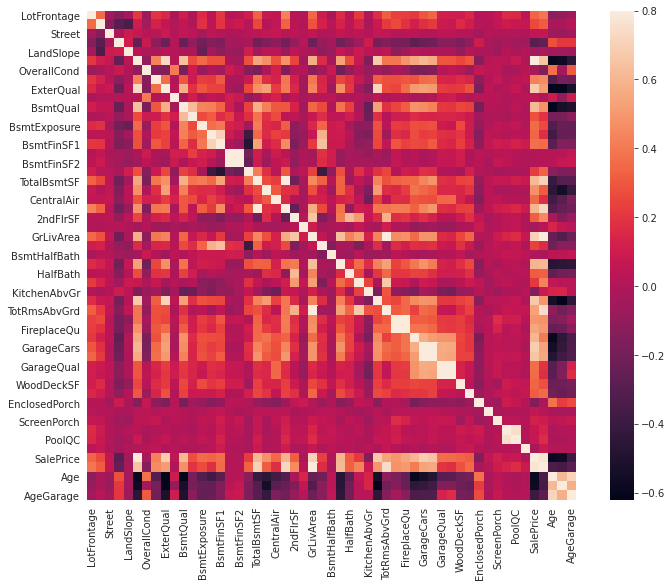

In [143]:
#correlation matrix
corrmat = all_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [146]:
def plot_numeric_features(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=110)

    sns.distplot(all_data[feature], ax=ax1)
    sns.scatterplot(all_data[feature], all_data["SalePrice"], ax=ax2)
    sns.boxplot(all_data[feature], ax=ax3, orient='v', width=0.2)

    print("Skewness Coefficient of LotFrontage is %.2f" %all_data[feature].skew())
    ax1.set_yticks([])
    
    return plt

# Outlier Detection

* We will try to `detect outlliers` for the `numeric features` and then `remove` them from our analysis
* But we will only remove those `outliers` which are a part of the `train data` i.e. having index within `ntrain` (defined earlier)

Skewness Coefficient of LotFrontage is 1.68


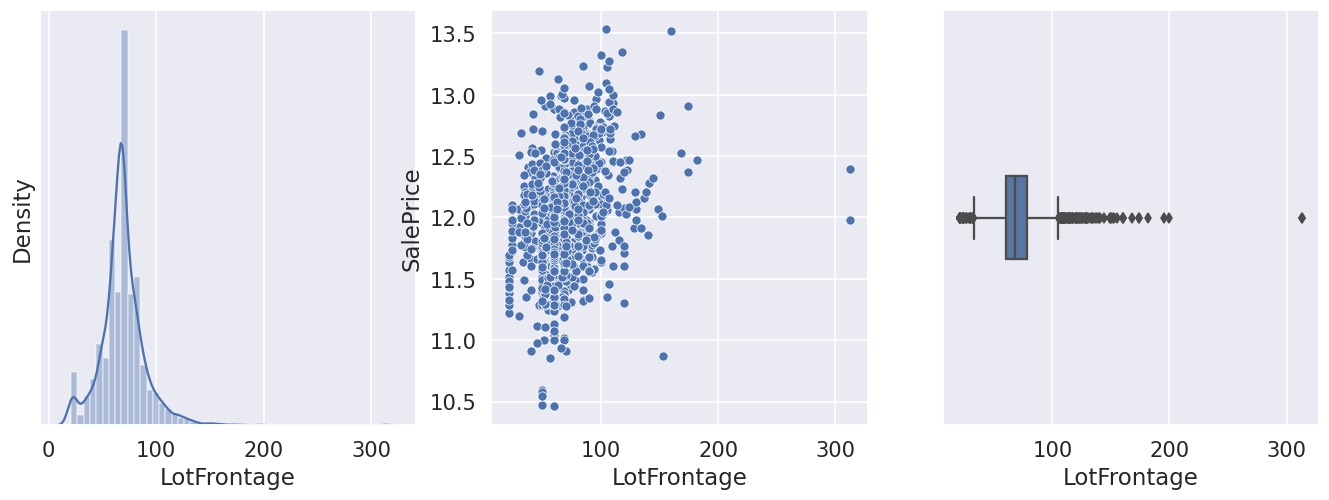

In [147]:
plot_numeric_features("LotFrontage").show()

2 Outliers present at `LotFrontage > 300`

In [148]:
drop_index = all_data['LotFrontage'][all_data['LotFrontage'] > 300].index

Skewness Coefficient of LotFrontage is 12.83


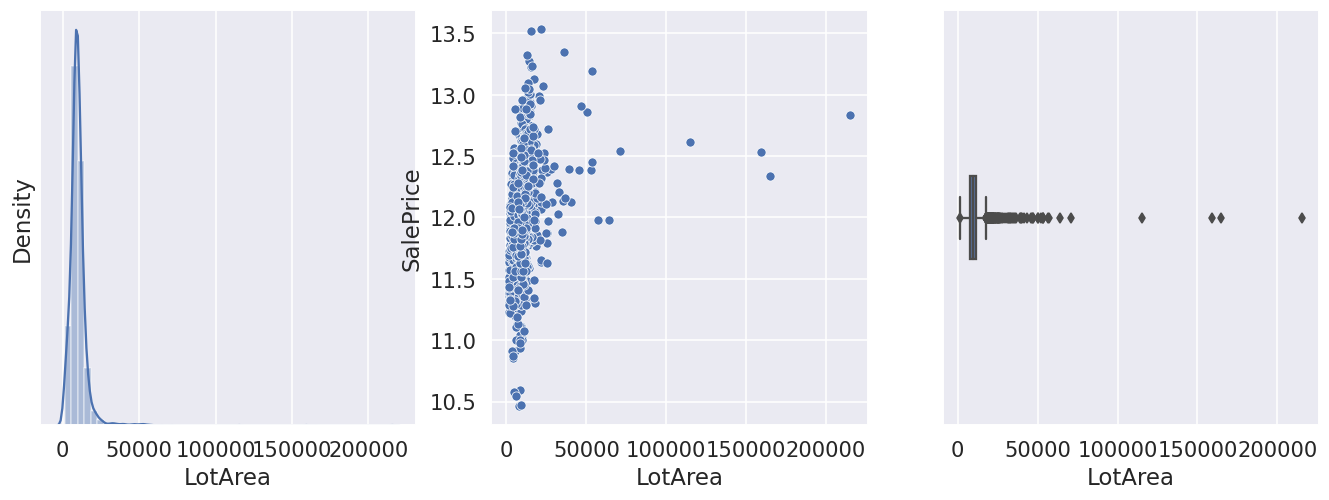

In [149]:
plot_numeric_features("LotArea").show()

4 Outliers present at `LotArea > 100000`

In [150]:
drop_index = np.append(drop_index, all_data['LotArea'][all_data['LotArea'] > 100000].index)

Skewness Coefficient of LotFrontage is 1.43


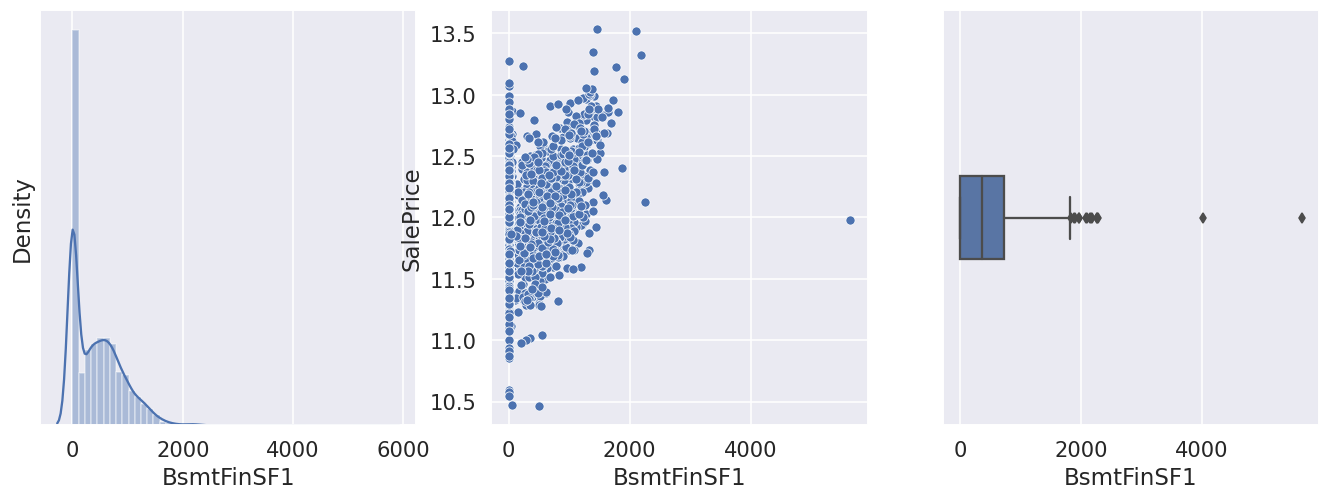

In [151]:
plot_numeric_features("BsmtFinSF1").show()

1 outlier present at `BsmtFinSF1 > 5000`

In [152]:
drop_index = np.append(drop_index, all_data['BsmtFinSF1'][all_data['BsmtFinSF1'] > 5000].index)

Skewness Coefficient of LotFrontage is 1.16


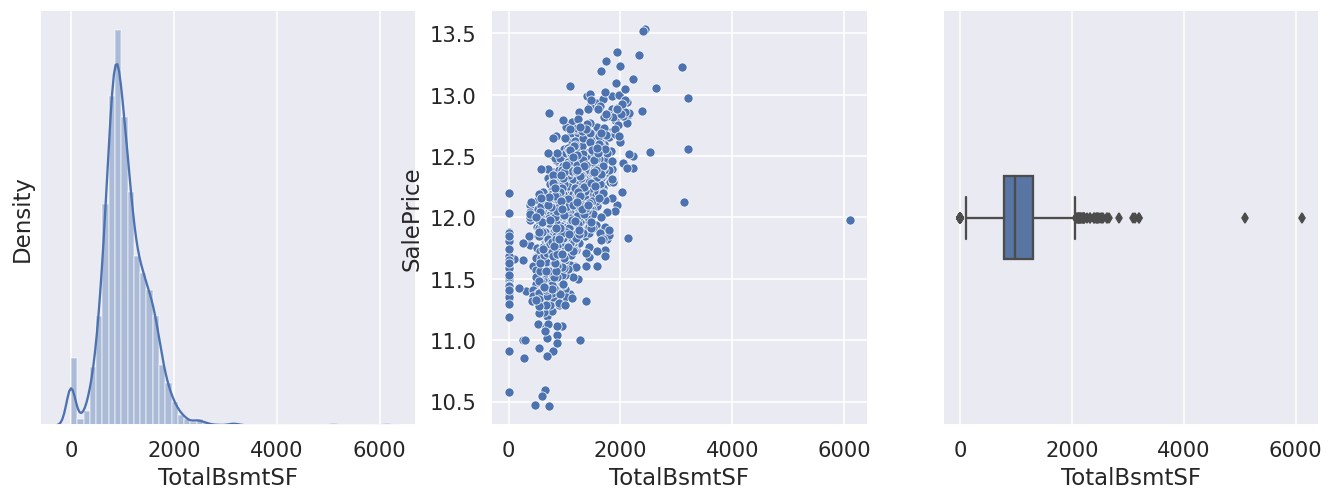

In [153]:
plot_numeric_features("TotalBsmtSF").show()

1 outlier present at `TotalBsmtSF > 6000`

In [154]:
drop_index = np.append(drop_index, all_data['TotalBsmtSF'][all_data['TotalBsmtSF'] > 6000].index)

Skewness Coefficient of LotFrontage is 1.47


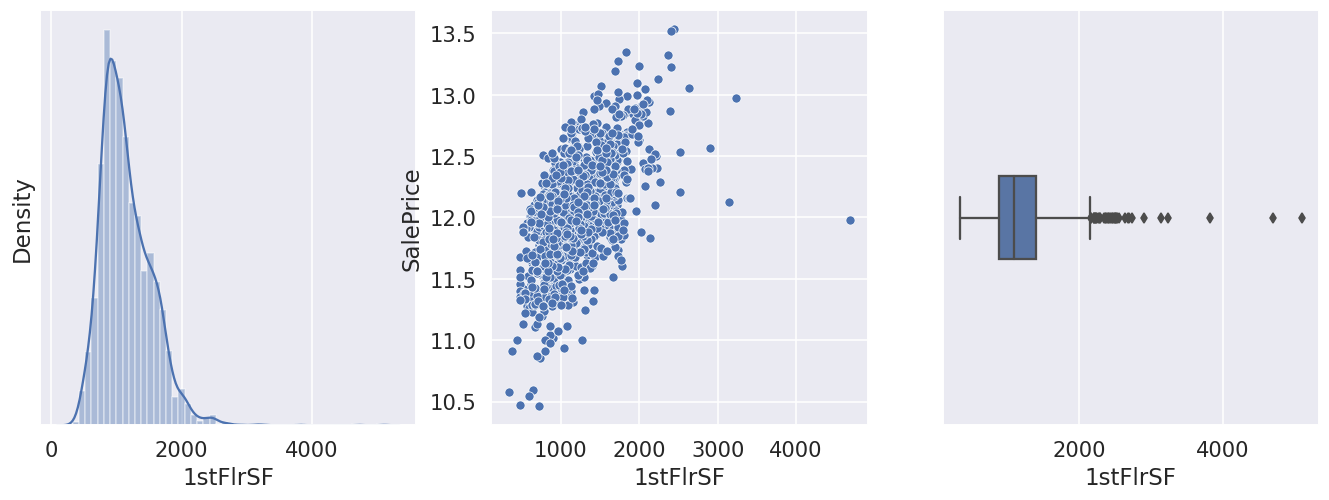

In [155]:
plot_numeric_features("1stFlrSF").show()

1 outlier present at `1stFlrSF > 4000`

In [156]:
drop_index = np.append(drop_index, all_data['1stFlrSF'][all_data['1stFlrSF'] > 4000].index)

Skewness Coefficient of LotFrontage is 1.27


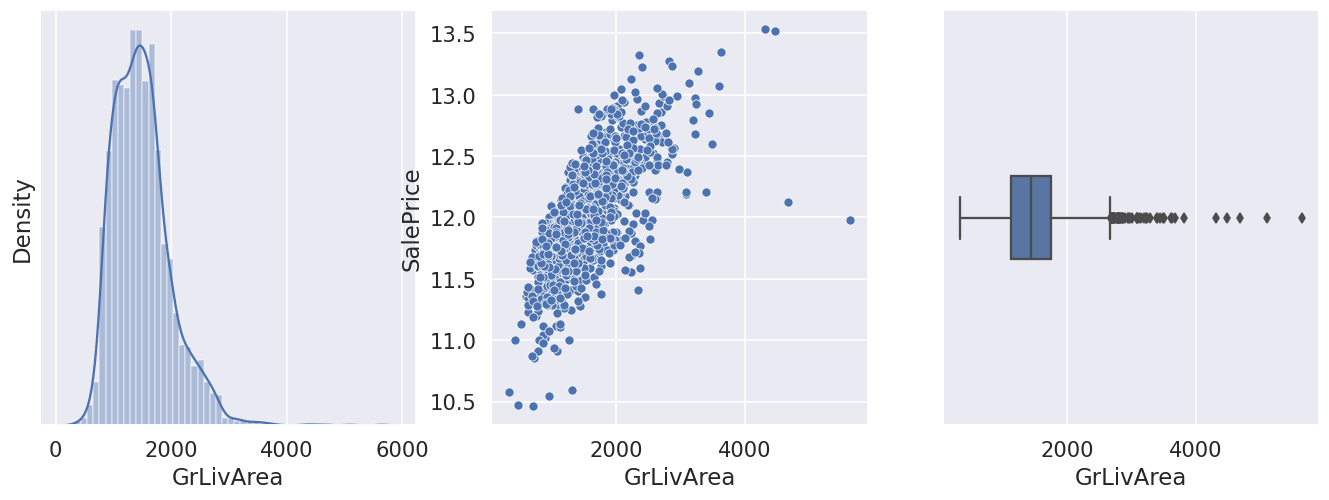

In [157]:
plot_numeric_features("GrLivArea").show()

2 outliers are present at `GrLivArea` greater than `4000` and `SalePrice` below `12.5`

In [158]:
drop_index = np.append(drop_index, all_data['GrLivArea'][
    (all_data['GrLivArea'] > 4000) & (all_data['SalePrice'] < 12.5)
].index)

In [159]:
## Making sure we only remove data from the train set
drop_index = drop_index[drop_index < ntrain]

all_data = all_data.drop(drop_index).reset_index(drop=True)

## Length of indexes dropped
dropped_count = len(drop_index)

## Modify our ntrain variable
ntrain -= dropped_count
dropped_count

11

**Note:** A total of 11 instances have been dropped. The training samples have reduced from `1460` to `1449`.

**Re-Analyzing the scatter plots after outlier removal**

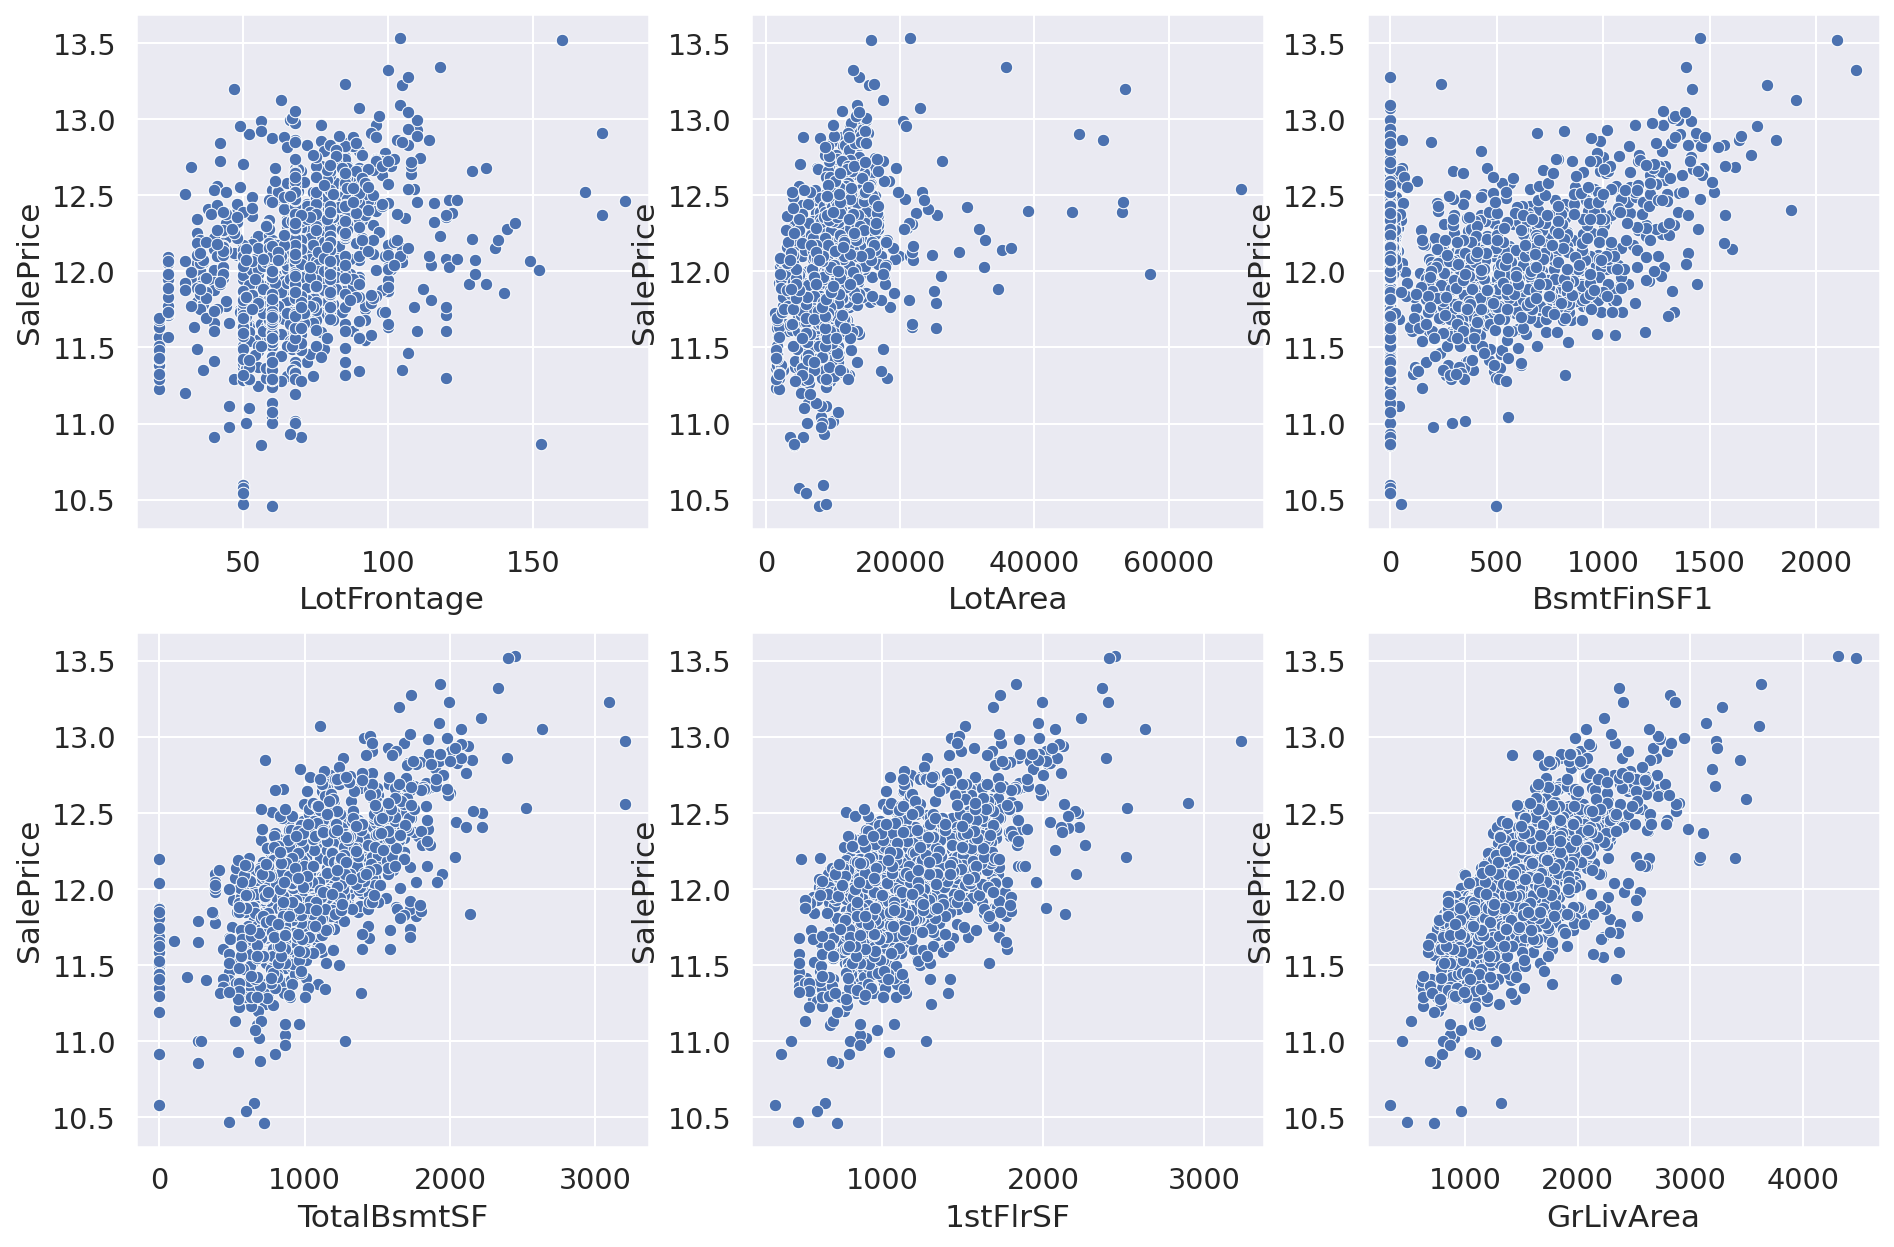

In [160]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10), dpi=150)

def create_scatter_plot(feature, axis):
    sns.scatterplot(all_data[feature], all_data["SalePrice"], ax=axis)
    
create_scatter_plot('LotFrontage', ax1)
create_scatter_plot('LotArea', ax2)
create_scatter_plot('BsmtFinSF1', ax3)
create_scatter_plot('TotalBsmtSF', ax4)
create_scatter_plot('1stFlrSF', ax5)
create_scatter_plot('GrLivArea', ax6)

plt.show()

In [161]:
X_train =  all_data[:-ntest].drop(['SalePrice'], axis=1)
traindf =  all_data[:-ntest]
y_train =  all_data[:-ntest]['SalePrice']
X_test  =  all_data[-ntest:].drop(['SalePrice'], axis=1)

In [162]:
traindf

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,TotalSF,Age,AgeRemod,AgeGarage
0,Class6,RL,65.0,8450,1,None,3,Lvl,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,0,Attchd,2,2.0,548.0,3,3,Y,0,61,0,0,0,0,0,None,None,0,WD,Normal,12.247699,4276.0,5,5,5.0
1,Class1,RL,80.0,9600,1,None,3,Lvl,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,3,Attchd,2,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,WD,Normal,12.109016,3786.0,31,31,31.0
2,Class6,RL,68.0,11250,1,None,2,Lvl,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486.0,1,0.0,434.0,920.0,GasA,4,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,3,6,Typ,1,3,Attchd,2,2.0,608.0,3,3,Y,0,42,0,0,0,0,0,None,None,0,WD,Normal,12.317171,4492.0,7,6,7.0
3,Class7,RL,60.0,9550,1,None,2,Lvl,Corner,2,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216.0,1,0.0,540.0,756.0,GasA,3,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,3,7,Typ,1,4,Detchd,1,3.0,642.0,3,3,Y,0,35,272,0,0,0,0,None,None,0,WD,Abnorml,11.849405,4190.0,91,36,8.0
4,Class6,RL,84.0,14260,1,None,2,Lvl,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655.0,1,0.0,490.0,1145.0,GasA,4,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,3,9,Typ,1,3,Attchd,2,3.0,836.0,3,3,Y,192,84,0,0,0,0,0,None,None,0,WD,Normal,12.429220,5541.0,8,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,Class6,RL,62.0,7917,1,None,3,Lvl,Inside,2,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,1,0.0,1,0.0,953.0,953.0,GasA,4,1,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,2,7,Typ,1,3,Attchd,2,2.0,460.0,3,3,Y,0,40,0,0,0,0,0,None,None,0,WD,Normal,12.072547,4247.0,8,7,8.0
1449,Class1,RL,85.0,13175,1,None,3,Lvl,Inside,2,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,119.0,2,2,CBlock,4,3,1,5,790.0,3,163.0,589.0,1542.0,GasA,2,1,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,2,7,Min1,2,3,Attchd,1,2.0,500.0,3,3,Y,349,0,0,0,0,0,0,MnPrv,None,0,WD,Normal,12.254868,5688.0,32,22,32.0
1450,Class7,RL,66.0,9042,1,None,3,Lvl,Inside,2,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,4,3,Stone,3,4,1,6,275.0,1,0.0,877.0,1152.0,GasA,4,1,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,3,9,Typ,2,4,Attchd,2,1.0,252.0,3,3,Y,0,60,0,0,0,0,0,GdPrv,Shed,2500,WD,Normal,12.493133,5832.0,69,4,69.0
1451,Class1,RL,68.0,9717,1,None,3,Lvl,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,3,3,2,6,49.0,3,1029.0,0.0,1078.0,GasA,3,1,FuseA,1078,0,0,1078,1.0,0.0,1,0,2,1,3,5,Typ,0,0,Attchd,1,1.0,240.0,3,3,Y,366,0,112,0,0,0,0,None,None,0,WD,Normal,11.864469,3234.0,60,14,60.0


In [163]:
traindf.isnull().sum()

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
              ..
SalePrice      0
TotalSF        0
Age            0
AgeRemod       0
AgeGarage      0
Length: 78, dtype: int64

### Using the pycaret library for machine learning modelling


*   Normalizing our data for regression
*   Transforming Numerical features using yeo-johnson method
*   Outliers are removed
*   No missing values
*   No Multicollinerarity
*   Ignoring Low Variance data
*   Combine Rare Levels for getting better overall prediction






In [238]:
modelsetup = setup(data = traindf, target = 'SalePrice', 
                   normalize = True,
                   transformation= True, transformation_method = 'yeo-johnson', 
                   transform_target = True) 

 
Setup Succesfully Completed.


,Description,Value
0,session_id,4458
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(1453, 78)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,53
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [239]:
# Exclude Theil–Sen Regressor and Least Angle Regressor
# Auto sort on RMSLE the standard on which Kaggle Competition is working
compare_models(blacklist = ['tr','lar'],sort = 'RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Bayesian Ridge,0.0796,0.0133,0.1145,0.9122,0.0090,0.0067,0.1924
1,Huber Regressor,0.0797,0.0135,0.1152,0.9121,0.0090,0.0067,0.2785
2,CatBoost Regressor,0.0805,0.0138,0.1167,0.9094,0.0091,0.0068,7.2945
3,Orthogonal Matching Pursuit,0.0841,0.0141,0.1177,0.9069,0.0092,0.0071,0.0250
4,Ridge Regression,0.0817,0.0139,0.1173,0.9086,0.0092,0.0069,0.0247
5,Gradient Boosting Regressor,0.0876,0.0158,0.1248,0.8961,0.0097,0.0073,0.9448
6,Extreme Gradient Boosting,0.0890,0.0164,0.1276,0.8913,0.0099,0.0075,0.6620
7,Support Vector Machine,0.0866,0.0180,0.1329,0.8836,0.0104,0.0073,0.3904
8,Light Gradient Boosting Machine,0.0936,0.0184,0.1348,0.8784,0.0105,0.0079,0.2319
9,Extra Trees Regressor,0.0985,0.0206,0.1419,0.8663,0.0110,0.0082,2.1562


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [240]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [241]:
cat_boost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0775,0.0132,0.1149,0.9307,0.0090,0.0065
1,0.0825,0.0120,0.1097,0.9158,0.0086,0.0069
2,0.0777,0.0107,0.1035,0.9163,0.0081,0.0065
3,0.0754,0.0159,0.1260,0.9237,0.0101,0.0064
4,0.0796,0.0116,0.1075,0.9238,0.0083,0.0066
5,0.0883,0.0149,0.1219,0.8986,0.0092,0.0073
6,0.0820,0.0201,0.1417,0.8123,0.0112,0.0070
7,0.0750,0.0105,0.1023,0.9291,0.0078,0.0062
8,0.0811,0.0132,0.1147,0.9337,0.0091,0.0068
9,0.0858,0.0156,0.1251,0.9103,0.0099,0.0072


In [242]:
print(cat_boost)

In [243]:
svm = create_model('svm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0845,0.0177,0.1330,0.9072,0.0105,0.0071
1,0.0817,0.0122,0.1104,0.9146,0.0086,0.0069
2,0.0772,0.0121,0.1099,0.9056,0.0086,0.0065
3,0.0865,0.0212,0.1454,0.8984,0.0116,0.0073
4,0.0890,0.0142,0.1190,0.9067,0.0092,0.0074
5,0.0948,0.0223,0.1492,0.8482,0.0113,0.0078
6,0.0845,0.0242,0.1554,0.7744,0.0124,0.0072
7,0.0720,0.0109,0.1043,0.9262,0.0078,0.0059
8,0.0955,0.0239,0.1545,0.8799,0.0123,0.0081
9,0.1008,0.0218,0.1476,0.8750,0.0117,0.0085


In [244]:
print(svm)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [245]:
huber =  create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0850,0.0153,0.1239,0.9195,0.0098,0.0071
1,0.0825,0.0135,0.1163,0.9053,0.0091,0.0069
2,0.0763,0.0108,0.1040,0.9154,0.0081,0.0064
3,0.0868,0.0182,0.1348,0.9127,0.0108,0.0074
4,0.0749,0.0096,0.0979,0.9368,0.0076,0.0062
5,0.0738,0.0119,0.1089,0.9191,0.0083,0.0061
6,0.0863,0.0195,0.1396,0.8180,0.0111,0.0074
7,0.0742,0.0087,0.0931,0.9413,0.0072,0.0062
8,0.0781,0.0131,0.1146,0.9339,0.0090,0.0066
9,0.0794,0.0141,0.1187,0.9191,0.0094,0.0067


In [246]:
print(huber)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


In [247]:
bayesian_ridge = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0841,0.0140,0.1185,0.9263,0.0094,0.0071
1,0.0804,0.0122,0.1103,0.9149,0.0086,0.0068
2,0.0832,0.0114,0.1068,0.9109,0.0084,0.0070
3,0.0818,0.0156,0.1248,0.9252,0.0100,0.0069
4,0.0778,0.0102,0.1008,0.9330,0.0078,0.0065
5,0.0801,0.0139,0.1180,0.9051,0.0089,0.0066
6,0.0815,0.0206,0.1435,0.8077,0.0114,0.0070
7,0.0712,0.0082,0.0907,0.9442,0.0070,0.0059
8,0.0778,0.0132,0.1150,0.9334,0.0091,0.0066
9,0.0779,0.0137,0.1169,0.9216,0.0093,0.0066


In [248]:
print(bayesian_ridge)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


### Tune Each models
Tuning hyperparameters of a machine learning model in any module is as simple as writing tune_model. It tunes the hyperparameter of the model passed as an estimator using Random grid search with pre-defined grids that are fully customizable.

In [249]:
tuned_catboost = tune_model(cat_boost, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0804,0.0134,0.1157,0.9298,0.0090,0.0067
1,0.0864,0.0132,0.1150,0.9074,0.0090,0.0073
2,0.0778,0.0106,0.1030,0.9171,0.0080,0.0066
3,0.0769,0.0165,0.1286,0.9205,0.0103,0.0065
4,0.0812,0.0121,0.1100,0.9202,0.0085,0.0068
5,0.0931,0.0152,0.1235,0.8960,0.0094,0.0077
6,0.0864,0.0221,0.1486,0.7937,0.0117,0.0073
7,0.0737,0.0107,0.1034,0.9275,0.0079,0.0061
8,0.0788,0.0124,0.1112,0.9378,0.0088,0.0066
9,0.0871,0.0163,0.1278,0.9063,0.0101,0.0074


In [250]:
print(tuned_catboost)

In [251]:
tuned_svm = tune_model(svm, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1574,0.0402,0.2006,0.7889,0.0156,0.0131
1,0.1524,0.0365,0.1911,0.7443,0.0148,0.0127
2,0.1450,0.0331,0.1818,0.7416,0.0142,0.0122
3,0.1619,0.0493,0.2220,0.7631,0.0172,0.0135
4,0.1688,0.0476,0.2182,0.6861,0.0167,0.0140
5,0.1962,0.0596,0.2442,0.5932,0.0187,0.0162
6,0.1388,0.0342,0.1850,0.6802,0.0147,0.0118
7,0.1571,0.0402,0.2004,0.7276,0.0153,0.0130
8,0.1782,0.0527,0.2296,0.7347,0.0179,0.0149
9,0.1554,0.0410,0.2025,0.7647,0.0159,0.0130


In [252]:
print(tuned_svm)

SVR(C=1.214, cache_size=200, coef0=0.0, degree=3, epsilon=1.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [253]:
tunedbr = tune_model(bayesian_ridge, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0839,0.0140,0.1182,0.9266,0.0094,0.0070
1,0.0803,0.0121,0.1100,0.9152,0.0086,0.0068
2,0.0831,0.0114,0.1067,0.9110,0.0083,0.0070
3,0.0820,0.0156,0.1249,0.9251,0.0100,0.0069
4,0.0780,0.0102,0.1009,0.9328,0.0078,0.0065
5,0.0801,0.0138,0.1173,0.9061,0.0089,0.0066
6,0.0816,0.0207,0.1437,0.8070,0.0114,0.0070
7,0.0711,0.0081,0.0900,0.9450,0.0069,0.0059
8,0.0779,0.0132,0.1149,0.9336,0.0091,0.0066
9,0.0779,0.0137,0.1169,0.9216,0.0093,0.0066


In [254]:
print(tunedbr)

BayesianRidge(alpha_1=0.05, alpha_2=0.2, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=False, lambda_1=0.1, lambda_2=1e-07,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)


In [255]:
tunedhuber = tune_model(huber, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0826,0.0152,0.1231,0.9204,0.0098,0.0069
1,0.0808,0.0129,0.1134,0.9099,0.0089,0.0068
2,0.0760,0.0104,0.1019,0.9188,0.0080,0.0064
3,0.0827,0.0174,0.1318,0.9166,0.0106,0.0070
4,0.0732,0.0093,0.0967,0.9384,0.0075,0.0061
5,0.0719,0.0115,0.1074,0.9213,0.0082,0.0059
6,0.0858,0.0198,0.1408,0.8147,0.0112,0.0073
7,0.0714,0.0077,0.0879,0.9475,0.0068,0.0060
8,0.0786,0.0135,0.1163,0.9320,0.0091,0.0066
9,0.0793,0.0136,0.1164,0.9222,0.0092,0.0067


In [256]:
print(tunedhuber)

HuberRegressor(alpha=0.3597, epsilon=1.2, fit_intercept=False, max_iter=100,
               tol=1e-05, warm_start=False)


### Blending Models to improve results

*Blending models is a method of ensembling which uses consensus among estimators to generate final predictions. The idea behind blending is to combine different machine learning algorithms and use a majority vote or the average predicted probabilities in case of classification to predict the final outcome. Blending models in PyCaret is as simple as writing blend_models. This function can be used to blend specific trained models that can be passed using estimator_list parameter within blend_models or if no list is passed, it will use all the models in model library.*

In [257]:
# Blending models
blender = blend_models(estimator_list = [tuned_catboost, svm, tunedbr, tunedhuber])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0756,0.0127,0.1126,0.9335,0.0089,0.0063
1,0.0780,0.0114,0.1066,0.9205,0.0083,0.0066
2,0.0725,0.0094,0.0971,0.9263,0.0076,0.0061
3,0.0768,0.0157,0.1254,0.9244,0.0101,0.0065
4,0.0759,0.0100,0.1001,0.9339,0.0077,0.0063
5,0.0783,0.0132,0.1147,0.9103,0.0087,0.0064
6,0.0796,0.0202,0.1422,0.8111,0.0113,0.0068
7,0.0650,0.0074,0.0860,0.9498,0.0065,0.0054
8,0.0763,0.0134,0.1157,0.9326,0.0092,0.0065
9,0.0800,0.0146,0.1206,0.9165,0.0096,0.0068


## Finalizing model for predictions 

In [258]:
model = finalize_model(blender)

In [259]:
print(model)

VotingRegressor(estimators=[('CatBoost Regressor_0',
                             <catboost.core.CatBoostRegressor object at 0x7fc256ff83c8>),
                            ('Support Vector Regressor_1',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False)),
                            ('Bayesian Ridge_2',
                             BayesianRidge(alpha_1=0.05, alpha_2=0.2,
                                           alpha_init=None, compute_score=True,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=0.1, lambda_2=1e-07,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                              

In [260]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0466,0.0051,0.0714,0.9664,0.0055,0 0.003893 dtype: float64


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,TotalSF,Age,AgeRemod,AgeGarage,MSSubClass_Class1,MSSubClass_Class10,MSSubClass_Class11,MSSubClass_Class12,MSSubClass_Class14,MSSubClass_Class15,MSSubClass_Class16,MSSubClass_Class2,MSSubClass_Class3,MSSubClass_Class4,MSSubClass_Class5,MSSubClass_Class6,MSSubClass_Class7,MSSubClass_Class8,MSSubClass_Class9,MSZoning_C,...,3SsnPorch_508,3SsnPorch_96,PoolArea_0,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_576,PoolArea_648,PoolArea_738,PoolQC_0,PoolQC_1,PoolQC_3,PoolQC_4,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,0,Label
0,0.111015,-0.098589,-0.771150,-1.150431,-0.357334,0.857575,-0.363012,-0.633114,1.177802,-0.134982,0.565448,-0.83393,-0.242977,0.248966,0.204903,-0.897859,1.363093,-0.408412,-0.294553,-0.188775,0.342670,-0.767802,-0.338552,-0.499793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.160034,12.1522
1,0.500489,0.295481,1.195974,0.740593,-0.357334,0.734761,1.058494,0.998061,-0.850040,-0.134982,0.154000,1.17503,-0.242977,0.248966,0.506900,0.836015,0.079837,-0.408412,-0.294553,-0.188775,0.479749,-0.905389,-0.540068,-0.670881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.225880,12.2763
2,0.111015,0.862237,-0.771150,0.074911,-0.357334,0.184163,-0.237844,-0.563230,-0.850040,-0.134982,-1.328651,-0.83393,-0.242977,-1.023211,-1.039254,1.374340,-0.984341,2.481045,-0.294553,-0.188775,-1.124013,0.623170,-0.753536,1.014946,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.790565,11.8076
3,0.593842,-0.173342,-0.771150,0.647575,-0.357334,-0.411952,-0.130236,-0.412811,-0.850040,-0.134982,-1.202998,1.17503,-0.242977,0.248966,0.723382,-0.897859,-0.071201,-0.408412,3.395873,-0.188775,-0.984402,0.416492,1.071399,-0.613014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.794345,11.8390
4,0.111015,0.004226,0.866707,-0.025801,-0.357334,1.537777,1.452813,1.375594,-0.850040,-0.134982,0.537124,1.17503,-0.242977,0.248966,0.353992,1.098659,-0.102969,-0.408412,-0.294553,-0.188775,0.891764,-1.240118,-1.056138,-1.098700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.206078,12.2745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,-0.994943,-0.308012,-0.771150,-0.561612,2.842604,0.297027,1.294640,1.223888,-0.850040,-0.134982,0.384821,1.17503,-0.242977,0.248966,0.302838,-0.897859,0.880370,-0.408412,-0.294553,-0.188775,0.727412,-0.678105,-0.274103,-0.3899

In [261]:
test_data = X_test.copy()
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,TotalSF,Age,AgeRemod,AgeGarage
1453,Class1,RH,80.0,11622,1,None,3,Lvl,Inside,2,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,3,3,1,3,468.0,2,144.0,270.0,882.0,GasA,2,1,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,2,5,Typ,0,0,Attchd,1,1.0,730.0,3,3,Y,140,0,0,0,120,0,0,MnPrv,None,0,WD,Normal,2674.0,49,49,49.0
1454,Class1,RL,81.0,14267,1,None,2,Lvl,Corner,2,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,2,2,CBlock,3,3,1,5,923.0,1,0.0,406.0,1329.0,GasA,2,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,Typ,0,0,Attchd,1,1.0,312.0,3,3,Y,393,36,0,0,0,0,0,None,Gar2,12500,WD,Normal,3987.0,52,52,52.0
1455,Class6,RL,74.0,13830,1,None,2,Lvl,Inside,2,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,6,791.0,1,0.0,137.0,928.0,GasA,3,1,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,2,6,Typ,1,3,Attchd,3,2.0,482.0,3,3,Y,212,34,0,0,0,0,0,MnPrv,None,0,WD,Normal,4186.0,13,12,13.0
1456,Class6,RL,78.0,9978,1,None,2,Lvl,Inside,2,Gilbert,Norm,Norm,1Fam,2Story,6,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,2,2,PConc,3,3,1,6,602.0,1,0.0,324.0,926.0,GasA,4,1,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,Typ,1,4,Attchd,3,2.0,470.0,3,3,Y,360,36,0,0,0,0,0,None,None,0,WD,Normal,4134.0,12,12,12.0
1457,Class12,RL,43.0,5005,1,None,2,HLS,Inside,2,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,2,PConc,4,3,1,5,263.0,1,0.0,1017.0,1280.0,GasA,4,1,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,Typ,0,0,Attchd,2,2.0,506.0,3,3,Y,0,82,0,0,144,0,0,None,None,0,WD,Normal,3840.0,18,18,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,Class14,RM,21.0,1936,1,None,3,Lvl,Inside,2,MeadowV,Norm,Norm,Twnhs,2Story,4,7,Gable,CompShg,CemntBd,CmentBd,None,0.0,2,2,CBlock,3,3,1,1,0.0,1,0.0,546.0,546.0,GasA,3,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,2,5,Typ,0,0,None,0,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,WD,Normal,2730.0,36,36,0.0
2908,Class14,RM,21.0,1894,1,None,3,Lvl,Inside,2,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,Gable,CompShg,CemntBd,CmentBd,None,0.0,2,2,CBlock,3,3,1,3,252.0,1,0.0,294.0,546.0,GasA,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,2,6,Typ,0,0,CarPort,1,1.0,286.0,3,3,Y,0,24,0,0,0,0,0,None,None,0,WD,Abnorml,2730.0,36,36,36.0
2909,Class1,RL,160.0,20000,1,None,3,Lvl,Inside,2,Mitchel,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,3,3,1,5,1224.0,1,0.0,0.0,1224.0,GasA,4,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,2,7,Typ,1,3,Detchd,1,2.0,576.0,3,3,Y,474,0,0,0,0,0,0,None,None,0,WD,Abnorml,3672.0,46,10,46.0
2910,Class10,RL,62.0,10441,1,None,3,Lvl,Inside,2,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,Gable,CompShg,HdBoard,Wd Shng,None,0.0,2,2,PConc,4,3,3,6,337.0,1,0.0,575.0,912.0,GasA,2,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,2,6,Typ,0,0,None,0,0.0,0.0,0,0,Y,80,32,0,0,0,0,0,MnPrv,Shed,700,WD,Normal,2852.0,14,14,0.0


## Doing Predictions on the test_data

In [262]:
predictions = predict_model(model, data = test_data)

In [263]:
predictions

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,TotalSF,Age,AgeRemod,AgeGarage,Label
0,Class1,RH,80.0,11622,1,None,3,Lvl,Inside,2,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,3,3,1,3,468.0,2,144.0,270.0,882.0,GasA,2,1,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,2,5,Typ,0,0,Attchd,1,1.0,730.0,3,3,Y,140,0,0,0,120,0,0,MnPrv,None,0,WD,Normal,2674.0,49,49,49.0,11.7387
1,Class1,RL,81.0,14267,1,None,2,Lvl,Corner,2,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,2,2,CBlock,3,3,1,5,923.0,1,0.0,406.0,1329.0,GasA,2,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,Typ,0,0,Attchd,1,1.0,312.0,3,3,Y,393,36,0,0,0,0,0,None,Gar2,12500,WD,Normal,3987.0,52,52,52.0,11.9720
2,Class6,RL,74.0,13830,1,None,2,Lvl,Inside,2,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,6,791.0,1,0.0,137.0,928.0,GasA,3,1,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,2,6,Typ,1,3,Attchd,3,2.0,482.0,3,3,Y,212,34,0,0,0,0,0,MnPrv,None,0,WD,Normal,4186.0,13,12,13.0,12.1928
3,Class6,RL,78.0,9978,1,None,2,Lvl,Inside,2,Gilbert,Norm,Norm,1Fam,2Story,6,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,2,2,PConc,3,3,1,6,602.0,1,0.0,324.0,926.0,GasA,4,1,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,Typ,1,4,Attchd,3,2.0,470.0,3,3,Y,360,36,0,0,0,0,0,None,None,0,WD,Normal,4134.0,12,12,12.0,12.2092
4,Class12,RL,43.0,5005,1,None,2,HLS,Inside,2,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,2,PConc,4,3,1,5,263.0,1,0.0,1017.0,1280.0,GasA,4,1,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,Typ,0,0,Attchd,2,2.0,506.0,3,3,Y,0,82,0,0,144,0,0,None,None,0,WD,Normal,3840.0,18,18,18.0,12.1432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Class14,RM,21.0,1936,1,None,3,Lvl,Inside,2,MeadowV,Norm,Norm,Twnhs,2Story,4,7,Gable,CompShg,CemntBd,CmentBd,None,0.0,2,2,CBlock,3,3,1,1,0.0,1,0.0,546.0,546.0,GasA,3,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,2,5,Typ,0,0,None,0,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,WD,Normal,2730.0,36,36,0.0,11.3689
1455,Class14,RM,21.0,1894,1,None,3,Lvl,Inside,2,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,Gable,CompShg,CemntBd,CmentBd,None,0.0,2,2,CBlock,3,3,1,3,252.0,1,0.0,294.0,546.0,GasA,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,2,6,Typ,0,0,CarPort,1,1.0,286.0,3,3,Y,0,24,0,0,0,0,0,None,None,0,WD,Abnorml,2730.0,36,36,36.0,11.3108
1456,Class1,RL,160.0,20000,1,None,3,Lvl,Inside,2,Mitchel,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,3,3,1,5,1224.0,1,0.0,0.0,1224.0,GasA,4,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,2,7,Typ,1,3,Detchd,1,2.0,576.0,3,3,Y,474,0,0,0,0,0,0,None,None,0,WD,Abnorml,3672.0,46,10,46.0,12.0337
1457,Class10,RL,62.0,10441,1,None,3,Lvl,Inside,2,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,Gable,CompShg,HdBoard,Wd Shng,None,0.0,2,2,PConc,4,3,3,6,337.0,1,0.0,575.0,912.0,GasA,2,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,2,6,Typ,0,0,None,0,0.0,0.0,0,0,Y,80,32,0,0,0,0,0,MnPrv,Shed,700,WD,Normal,2852.0,14,14,0.0,11.7284


In [264]:
# Generating CSV for Kaggle Submissions 
sub = pd.DataFrame({
        "Id": test['Id'],
        "SalePrice": predictions['Label']
    })

sub.to_csv('gdrive/My Drive/Colab Notebooks/submission.csv', index=False)

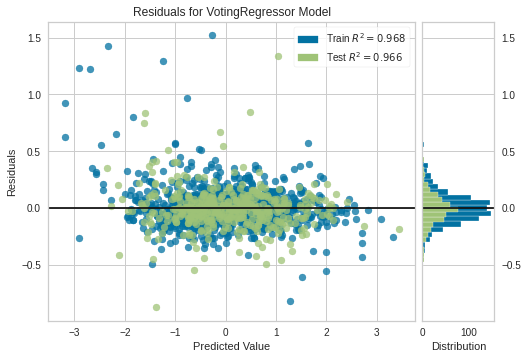

In [265]:
plot_model(model)

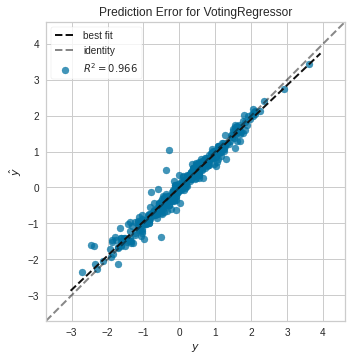

In [266]:
plot_model(model, plot = 'error')

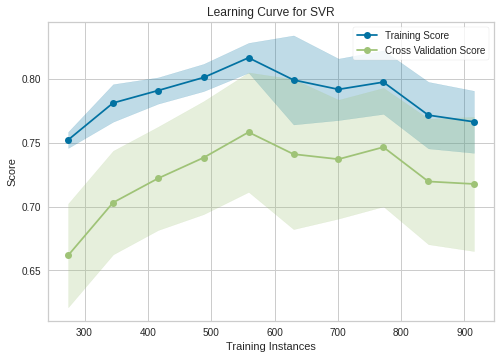

In [267]:
plot_model(tuned_svm, plot = 'learning')


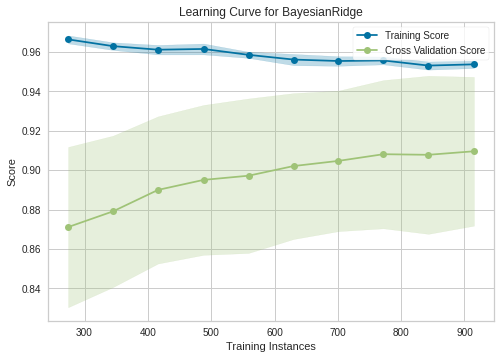

In [268]:
plot_model(tunedbr, plot = 'learning')

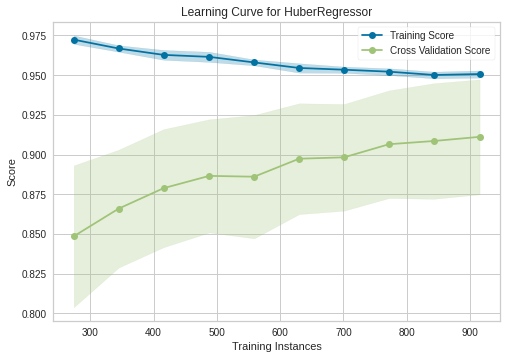

In [269]:
plot_model(tunedhuber, plot = 'learning')

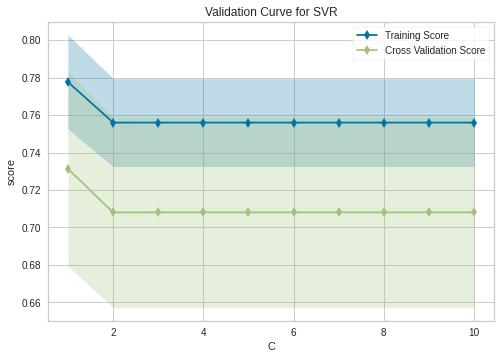

In [270]:
plot_model(tuned_svm, plot = 'vc')

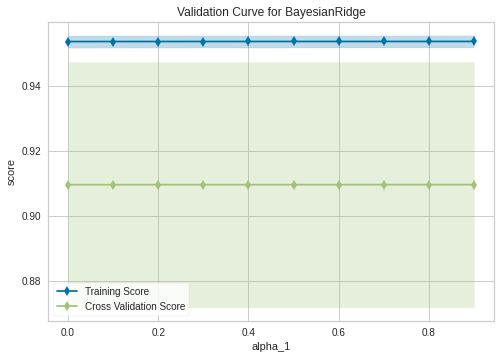

In [271]:
plot_model(tunedbr, plot = 'vc')

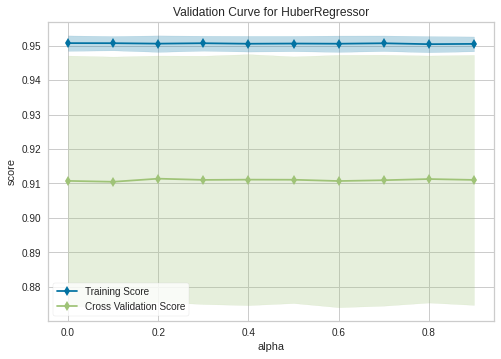

In [272]:
plot_model(tunedhuber, plot = 'vc')

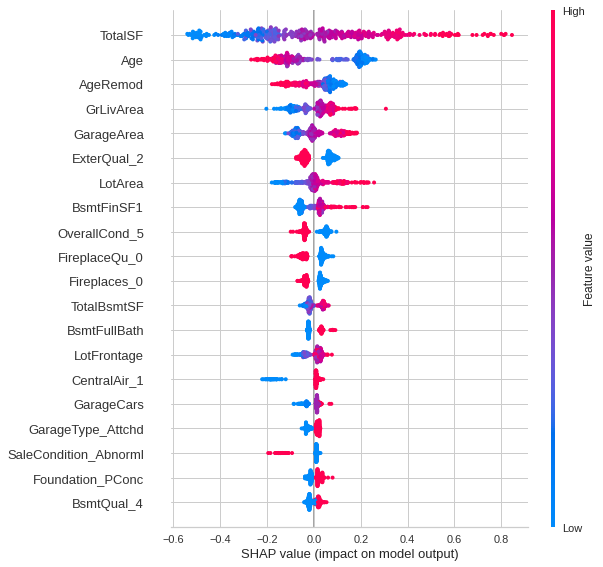

In [273]:
interpret_model(tuned_catboost)

## Save / Load Model

In [274]:
save_model(model, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


In [275]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='SalePrice',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Leve...
                                                  target='SalePrice')),
                ('pt_target',
                 Target_Transformation(function_to_apply='box-cox',
                                       target='SalePrice')),
                ('binn', Empty()), ('re

In [276]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='SalePrice',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Leve...
                                                  target='SalePrice')),
                ('pt_target',
                 Target_Transformation(function_to_apply='box-cox',
                                       target='SalePrice')),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()),
                ('dummy', Dummify(target='SalePrice')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

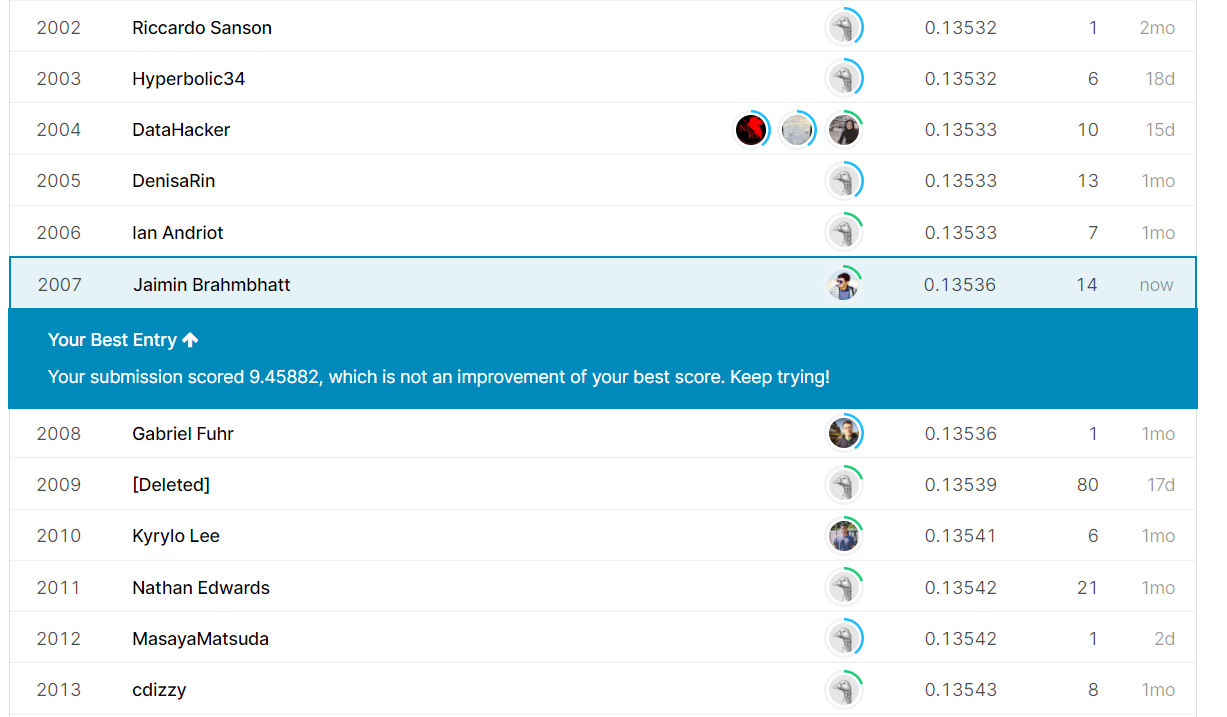